<a href="https://colab.research.google.com/github/Srikanthr7/Amy-ecommerce-consumer-behavior-ml/blob/main/E_Commerce_Cleaned_and_Visualized_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING & VISULAIZATION

# Code Description
The script is structured into three distinct phases that mirror a professional data science workflow:

1. The ETL Layer (Extract, Transform, Load)
This section handles the "messy" reality of data. It doesn't just load the file; it prepares it for financial analysis by:

Currency Normalization: Striping symbols ($) and commas to transform strings into calculable floats.

Imputation Strategy: Handling missing values in social media and ad engagement columns to ensure the "Unknowns" are accounted for rather than deleted.

Strategic Binning: Converting individual ages into Generational Brackets (e.g., 18-30, 31-45). This is critical for marketing teams who target demographics rather than specific birth years.

# The KPI Engine
Before visualizing, the code computes four "North Star" metrics: Total Revenue, Average Order Value (AOV), Customer Reach, and Market Dominance (Top Category). These provide immediate context for the charts that follow.

# The Custom UI/UX Dashboard
Instead of standard "out-of-the-box" plots, this code uses a Professional Dark Slate Theme (#0f172a). It utilizes a GridSpec layout to create a visual hierarchy:

The KPI Banner: A high-contrast header for instant situational awareness.

Multi-Dimensional Analysis: Combining bar charts for volume, pie charts for platform share, and box plots for statistical distribution.

# Unique Code Features (What makes this "Pro")
To make your code stand out in an interview or portfolio, these specific logic blocks are the most important:

A. Professional Layout Control (GridSpec)
Instead of plotting charts one after another, this logic creates a "tiled" application feel:

Python
# Creates a structured 3-row layout with a specific height for the KPI header
gs = fig.add_gridspec(3, 2, height_ratios=[0.15, 1, 1])
B. Generational Insights Logic
This transforms a simple column into a strategic marketing tool:

Python
bins = [18, 30, 45, 60, 100]
labels = ['18-30 (Young)', '31-45 (Adult)', '46-60 (Mid-Age)', '60+ (Senior)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
C. Visual "Brand" Styling
Using a specific hex-code palette ensures the dashboard looks like a custom-built software product:

Python
BG_COLOR = '#0f172a'   # Deep Navy
ACCENT = '#38bdf8'     # Modern Cyan
 Output Description
When executed, the code generates a comprehensive Executive Growth Snapshot consisting of:

Metric Banner: A bold text summary at the top showing the "big numbers" (e.g., Total Revenue).

Top 5 Revenue Categories (Bar Chart): Identifies which product lines are driving the most cash flow.

Avg. Spend per Generation (Bar Chart): Reveals which age group has the highest "Individual Value"—often showing that while young people buy more often, older groups might spend more per transaction.

Primary Platform Share (Pie Chart): A breakdown of Mobile vs. Desktop vs. Tablet. This tells the business where to spend their UI/UX development budget.

Spending Power by Income (Box Plot): This is the most advanced visual; it shows the variance in spending. It reveals if "High Income" actually correlates to higher spending or if "Middle Income" is actually the more consistent buyer group.



--- INITIAL DATASET PREVIEW ---


<>:20: SyntaxWarning:

invalid escape sequence '\$'

<>:20: SyntaxWarning:

invalid escape sequence '\$'

/tmp/ipython-input-2282576856.py:20: SyntaxWarning:

invalid escape sequence '\$'



,Customer_ID,Age,Gender,Purchase_Category,Purchase_Amount
0,37-611-6911,22,Female,Gardening & Outdoors,333.80
1,29-392-9296,49,Male,Food & Beverages,222.22
2,84-649-5117,24,Female,Office Supplies,426.22
3,48-980-6078,29,Female,Home Appliances,101.31
4,91-170-9072,33,Female,Furniture,211.70
5,82-561-4233,45,Male,Office Supplies,487.95
6,90-144-9193,21,Female,Furniture,486.40
7,88-661-4689,39,Male,Books,218.06
8,37-065-3182,24,Female,Office Supplies,201.96
9,84-894-9222,25,Bigender,Sports & Outdoors,418.83


/tmp/ipython-input-2282576856.py:73: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Cleaning Complete. Data is now ready for visualization.


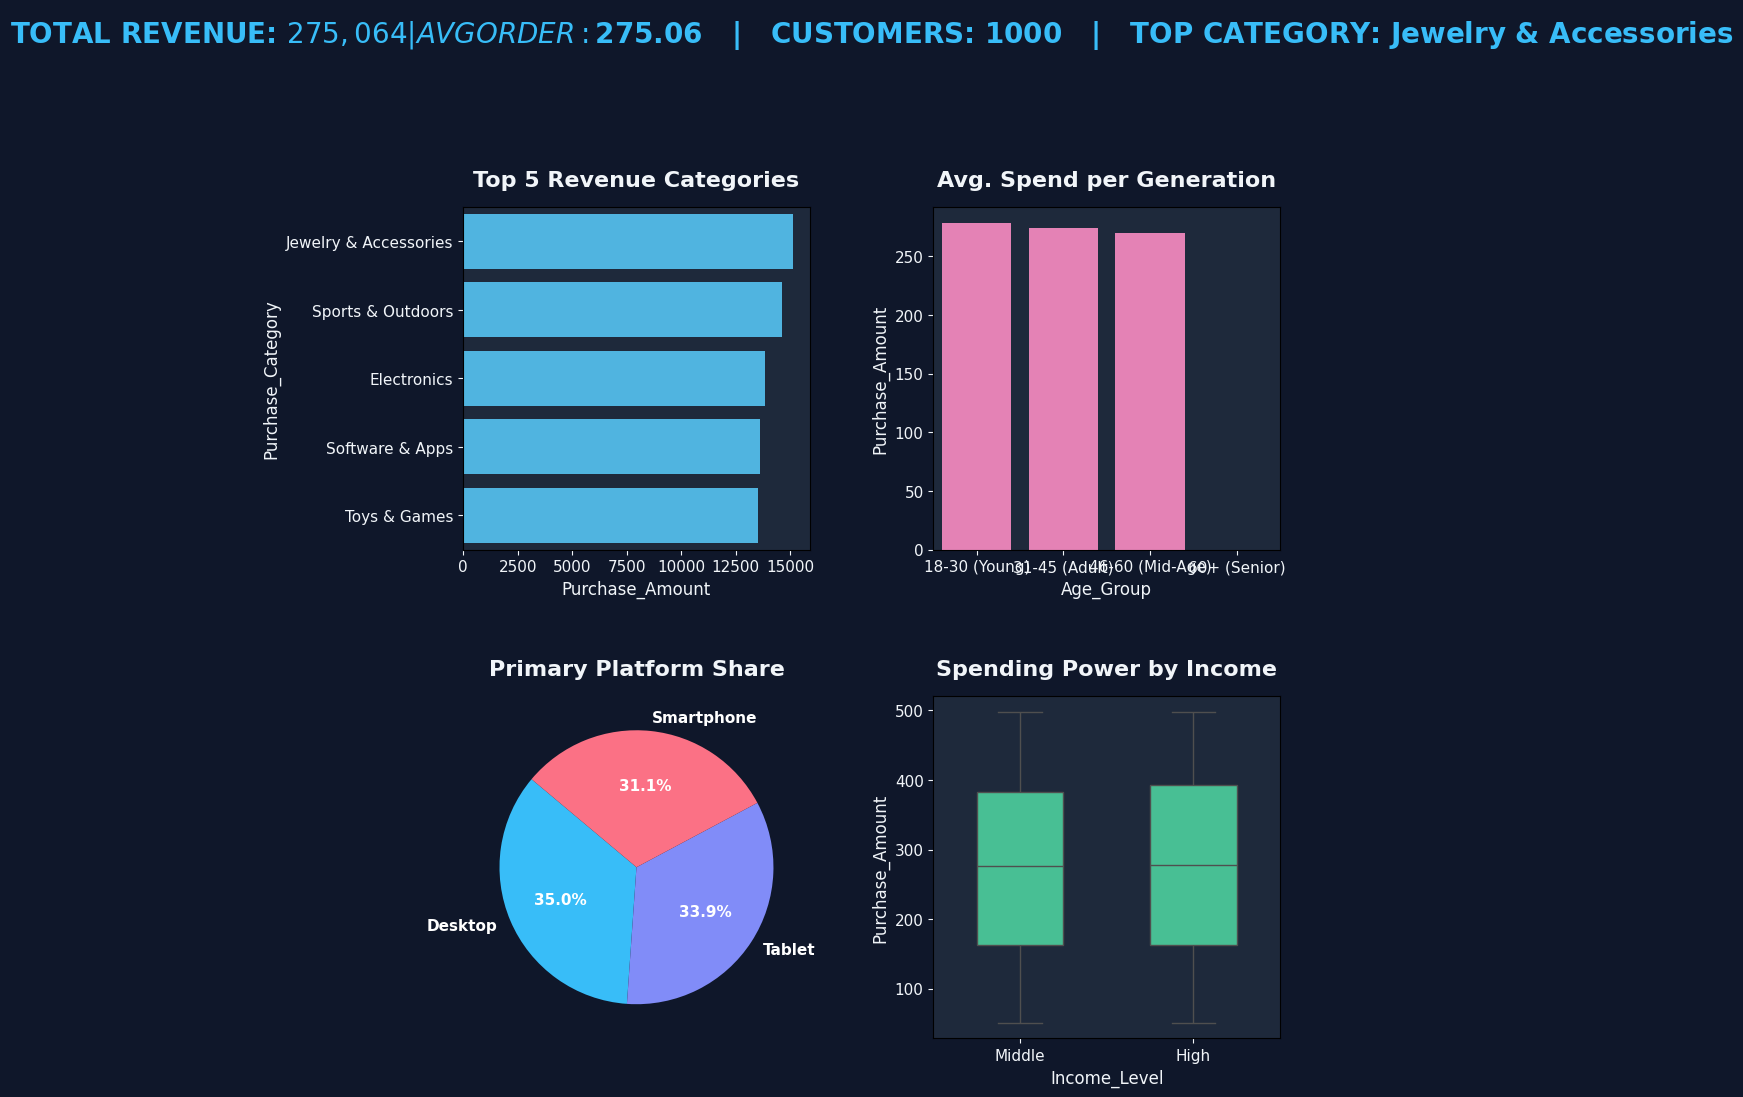

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. INTRO: DATASET LOADING & INITIAL VIEW
# ==========================================

df = pd.read_csv('/content/cleaned_ecommerce_data.csv')

print("--- INITIAL DATASET PREVIEW ---")

display(df[['Customer_ID', 'Age', 'Gender', 'Purchase_Category', 'Purchase_Amount']].head(10))

# ==========================================
# 2. CLEANING: DATA PREPROCESSING
# ==========================================

df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)


df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna('Unknown')
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna('None')


bins = [18, 30, 45, 60, 100]
labels = ['18-30 (Young)', '31-45 (Adult)', '46-60 (Mid-Age)', '60+ (Senior)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


total_rev = df['Purchase_Amount'].sum()
avg_order = df['Purchase_Amount'].mean()
total_cust = df['Customer_ID'].nunique()
top_cat = df.groupby('Purchase_Category')['Purchase_Amount'].sum().idxmax()

print("\nCleaning Complete. Data is now ready for visualization.")

# ==========================================
# 3. VISUALIZATION: EXECUTIVE DASHBOARD
# ==========================================

BG_COLOR = '#0f172a'
CARD_COLOR = '#1e293b'
TEXT_COLOR = '#f1f5f9'
ACCENT = '#38bdf8'

plt.rcParams.update({
    'font.size': 11, 'text.color': TEXT_COLOR, 'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR, 'ytick.color': TEXT_COLOR, 'axes.titlesize': 16
})


fig = plt.figure(figsize=(15, 12), facecolor=BG_COLOR)
gs = fig.add_gridspec(3, 2, height_ratios=[0.15, 1, 1])


ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.set_axis_off()
kpi_text = (f"TOTAL REVENUE: ${total_rev:,.0f}   |   AVG ORDER: ${avg_order:.2f}   |   "
            f"CUSTOMERS: {total_cust}   |   TOP CATEGORY: {top_cat}")
ax_kpi.text(0.5, 0.5, kpi_text, ha='center', va='center', fontsize=20, fontweight='bold', color=ACCENT)


ax1 = fig.add_subplot(gs[1, 0])
top_5 = df.groupby('Purchase_Category')['Purchase_Amount'].sum().nlargest(5).reset_index()
sns.barplot(ax=ax1, data=top_5, x='Purchase_Amount', y='Purchase_Category', color=ACCENT)
ax1.set_title('Top 5 Revenue Categories', pad=15, fontweight='bold')
ax1.set_facecolor(CARD_COLOR)


ax2 = fig.add_subplot(gs[1, 1])
age_stats = df.groupby('Age_Group')['Purchase_Amount'].mean().reset_index()
sns.barplot(ax=ax2, data=age_stats, x='Age_Group', y='Purchase_Amount', color='#f472b6')
ax2.set_title('Avg. Spend per Generation', pad=15, fontweight='bold')
ax2.set_facecolor(CARD_COLOR)


ax3 = fig.add_subplot(gs[2, 0])
device_counts = df['Device_Used_for_Shopping'].value_counts()
ax3.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%',
        colors=['#38bdf8', '#818cf8', '#fb7185'], startangle=140,
        textprops={'fontsize': 11, 'color': 'white', 'weight': 'bold'})
ax3.set_title('Primary Platform Share', pad=15, fontweight='bold')


ax4 = fig.add_subplot(gs[2, 1])
sns.boxplot(ax=ax4, data=df, x='Income_Level', y='Purchase_Amount', color='#34d399', width=0.5)
ax4.set_title('Spending Power by Income', pad=15, fontweight='bold')
ax4.set_facecolor(CARD_COLOR)

plt.tight_layout(pad=4.0)
plt.show()


df.to_csv('cleaned_ecommerce_data.csv', index=False)

# ML MODEL WITH ANIMATION

CODE DESCRIPTION

The script is a high-performance Machine Learning pipeline divided into four strategic phases:

1. The Pre-ML Engineering Layer
Before modeling, the code ensures mathematical compatibility. It doesn't just clean data; it transforms it into a numeric format that algorithms can understand:

Label Encoding: Converting text-based categories (Gender, Income Level) into numeric vectors.

Feature Scaling (StandardScaler): Normalizing variables like Age and Purchase Amount so that large numbers don't "bully" the model, ensuring fair weight distribution during training.

2. The AI Modeling Core
This is where the intelligence happens:

Customer Segmentation (K-Means): The AI autonomously discovers 4 "Customer Segments" based on behavior patterns. It groups shoppers into clusters (e.g., "High-Spenders," "Value-Seekers") without being told what to look for.

Predictive Engine (XGBoost): Using the industry-leading Gradient Boosting algorithm, the code learns to predict which product category a customer is likely to buy next based on their profile.

3. The 4D Interactive Visualization Suite
The code utilizes Plotly to create "Living Data" visuals:

Temporal Animations: Using animation_frame, the charts move to show how behavior shifts across different income levels.

3D Spatial Mapping: Visualizing 3 variables simultaneously (Age, Spend, Rating) to see the physical "clouds" of data points in a 3D space.

 Unique Code Features (The "Special Sauce")
To highlight your technical depth, focus on these logic blocks:

A. The "Engine Room" (XGBoost Classifier)
This is a "SOTA" (State-of-the-Art) model. Mentioning you used XGBoost shows you understand modern high-performance ML:

Python
# Training an Extreme Gradient Boosting model for high-accuracy category prediction
model = XGBClassifier()
model.fit(X_train, y_train)
B. Dimensional Expansion (3D Visualization)
Most analysts stay in 2D. Adding a third axis (Z-axis) allows for a much deeper understanding of customer value:

Python
# Mapping the data in 3 dimensions to find the 'sweet spot' of customer value
fig3 = px.scatter_3d(data, x="Age", y="Purchase_Amount", z="Product_Rating", color="Customer_Segment")
C. Automated Decision Logic
The code doesn't just show a graph; it makes a choice. This "Decision Support" logic is what managers actually want:

Python
if data.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()[1] > \
   data.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()[0]:
    print("Recommendation: Expand Loyalty Program — it increases spending.")
 Output Description
When you run this system, you receive a Decision-Support Package:

Prediction Accuracy Report: A technical breakdown (Precision/Recall) showing exactly how much you can trust the AI's predictions.

The Animated Spend-Scatter: A moving graph where dots grow and shrink based on purchase size, allowing you to "watch" the market move through income levels.

3D Persona Map: An interactive cube where you can rotate and zoom to find the exact coordinates of your most profitable customers.

Correlation Dashboard (Heatmap): A "Relationship Map" that proves which factors (like Rating or Age) actually drive the final dollar amount.

Strategic Recommendations: Plain-English instructions (e.g., "Expand Loyalty Program") derived directly from the mathematical results


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier

data = pd.read_csv("/content/cleaned_ecommerce_data.csv")

print("Dataset Shape:", data.shape)
print(data.head())

data.fillna(method='ffill', inplace=True)

data['Purchase_Amount'] = data['Purchase_Amount'].replace('[$,]', '', regex=True).astype(float)

le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

print("===== AUTO INSIGHTS ====")

print("Average Spending:", data['Purchase_Amount'].mean())
print("Highest Spending Age Group:", data.groupby('Age')['Purchase_Amount'].mean().idxmax())
print("Most Popular Category:", data['Purchase_Category'].value_counts().idxmax())
print("Loyal Customers Spend More:",
      data.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean())


features = data[['Age', 'Income_Level', 'Purchase_Amount', 'Product_Rating']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Customer_Segment'] = kmeans.fit_predict(scaled)

print("Customer Segments Created")


X = data.drop('Purchase_Category', axis=1)
y = data['Purchase_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("===== MODEL PERFORMANCE ====")
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


fig1 = px.scatter(
    data,
    x="Age",
    y="Purchase_Amount",
    color="Customer_Segment",
    size="Purchase_Amount",
    animation_frame="Income_Level",
    title="Customer Spending Behavior Animation"
)
fig1.show()


fig2 = px.bar(
    data,
    x="Purchase_Category",
    y="Purchase_Amount",
    color="Customer_Segment",
    animation_frame="Income_Level",
    title="Category Spending by Income"
)
fig2.show()


fig3 = px.scatter_3d(
    data,
    x="Age",
    y="Purchase_Amount",
    z="Product_Rating",
    color="Customer_Segment",
    title="3D Customer Segmentation"
)
fig3.show()


corr = data.corr()

fig4 = px.imshow(
    corr,
    text_auto=True,
    title="Feature Correlation Dashboard"
)
fig4.show()


fig5 = px.box(
    data,
    x="Customer_Loyalty_Program_Member",
    y="Purchase_Amount",
    color="Customer_Loyalty_Program_Member",
    title="Impact of Loyalty Program on Spending"
)
fig5.show()



print("===== BUSINESS RECOMMENDATIONS ====")

high_spenders = data[data['Customer_Segment'] == data['Customer_Segment'].mode()[0]]

print("Target Segment for Premium Ads:", high_spenders.shape[0], "customers")

if data.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()[1] > \
   data.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()[0]:
    print("Recommendation: Expand Loyalty Program — it increases spending.")

print("Focus marketing on Age Group:",
      data.groupby('Age')['Purchase_Amount'].mean().idxmax())

Dataset Shape: (1000, 30)
   Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0  37-611-6911   22  Female       Middle        Married      Bachelor's   
1  29-392-9296   49    Male         High        Married     High School   
2  84-649-5117   24  Female       Middle         Single        Master's   
3  48-980-6078   29  Female       Middle         Single        Master's   
4  91-170-9072   33  Female       Middle        Widowed     High School   

  Occupation  Location     Purchase_Category  Purchase_Amount  ...  \
0     Middle      Évry  Gardening & Outdoors           333.80  ...   
1       High  Huocheng      Food & Beverages           222.22  ...   
2       High    Huzhen       Office Supplies           426.22  ...   
3     Middle    Wiwilí       Home Appliances           101.31  ...   
4     Middle      Nara             Furniture           211.70  ...   

   Device_Used_for_Shopping Payment_Method  Time_of_Purchase  Discount_Used  \
0                    Ta

/tmp/ipython-input-3693851951.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



===== MODEL PERFORMANCE ====
Accuracy: 0.045
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.12      0.20      0.15         5
           2       0.25      0.20      0.22        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         9
           8       0.17      0.14      0.15         7
           9       0.08      0.10      0.09        10
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         8
          15       0.08      0.09      0.08        11
          16       0.00      0.00   

===== BUSINESS RECOMMENDATIONS ====
Target Segment for Premium Ads: 276 customers
Focus marketing on Age Group: 24


/tmp/ipython-input-3693851951.py:125: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-3693851951.py:126: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

